In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
inp_dir=r"C:\Users\Ash kan\Documents\watbalpy\waterball_test\modelito_for_paper_tests\v5_modelito_change_zone_5_6_soil_charc\all_regions_and_Total_report.csv"
df=pd.read_csv(inp_dir)

c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\pandas\core\generic.py:9032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(cond, other, inplace, axis, level, errors=errors)


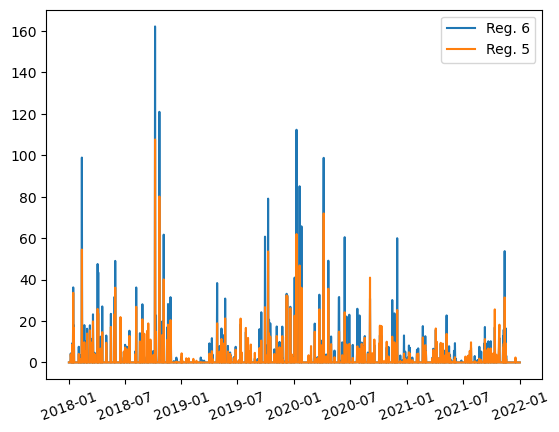

In [3]:
ax = plt.gca()
df_=df.set_index(pd.to_datetime(df["Time"]))
feat="Prec"
for n in [5,4]:
    ii="REG_"+str(n+1)+"_"+feat
    df_[[ii]].mask(df_[[ii]] <0, 0, inplace=True)
    plt.plot(df_[[ii]],label="Reg. " + str(n+1))
plt.legend()
plt.xticks(rotation=20)
#plt.figure().set_figwidth(20)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs",feat+"_all_regions.png"),dpi=600)
plt.show()

1
2
3
4
5
6


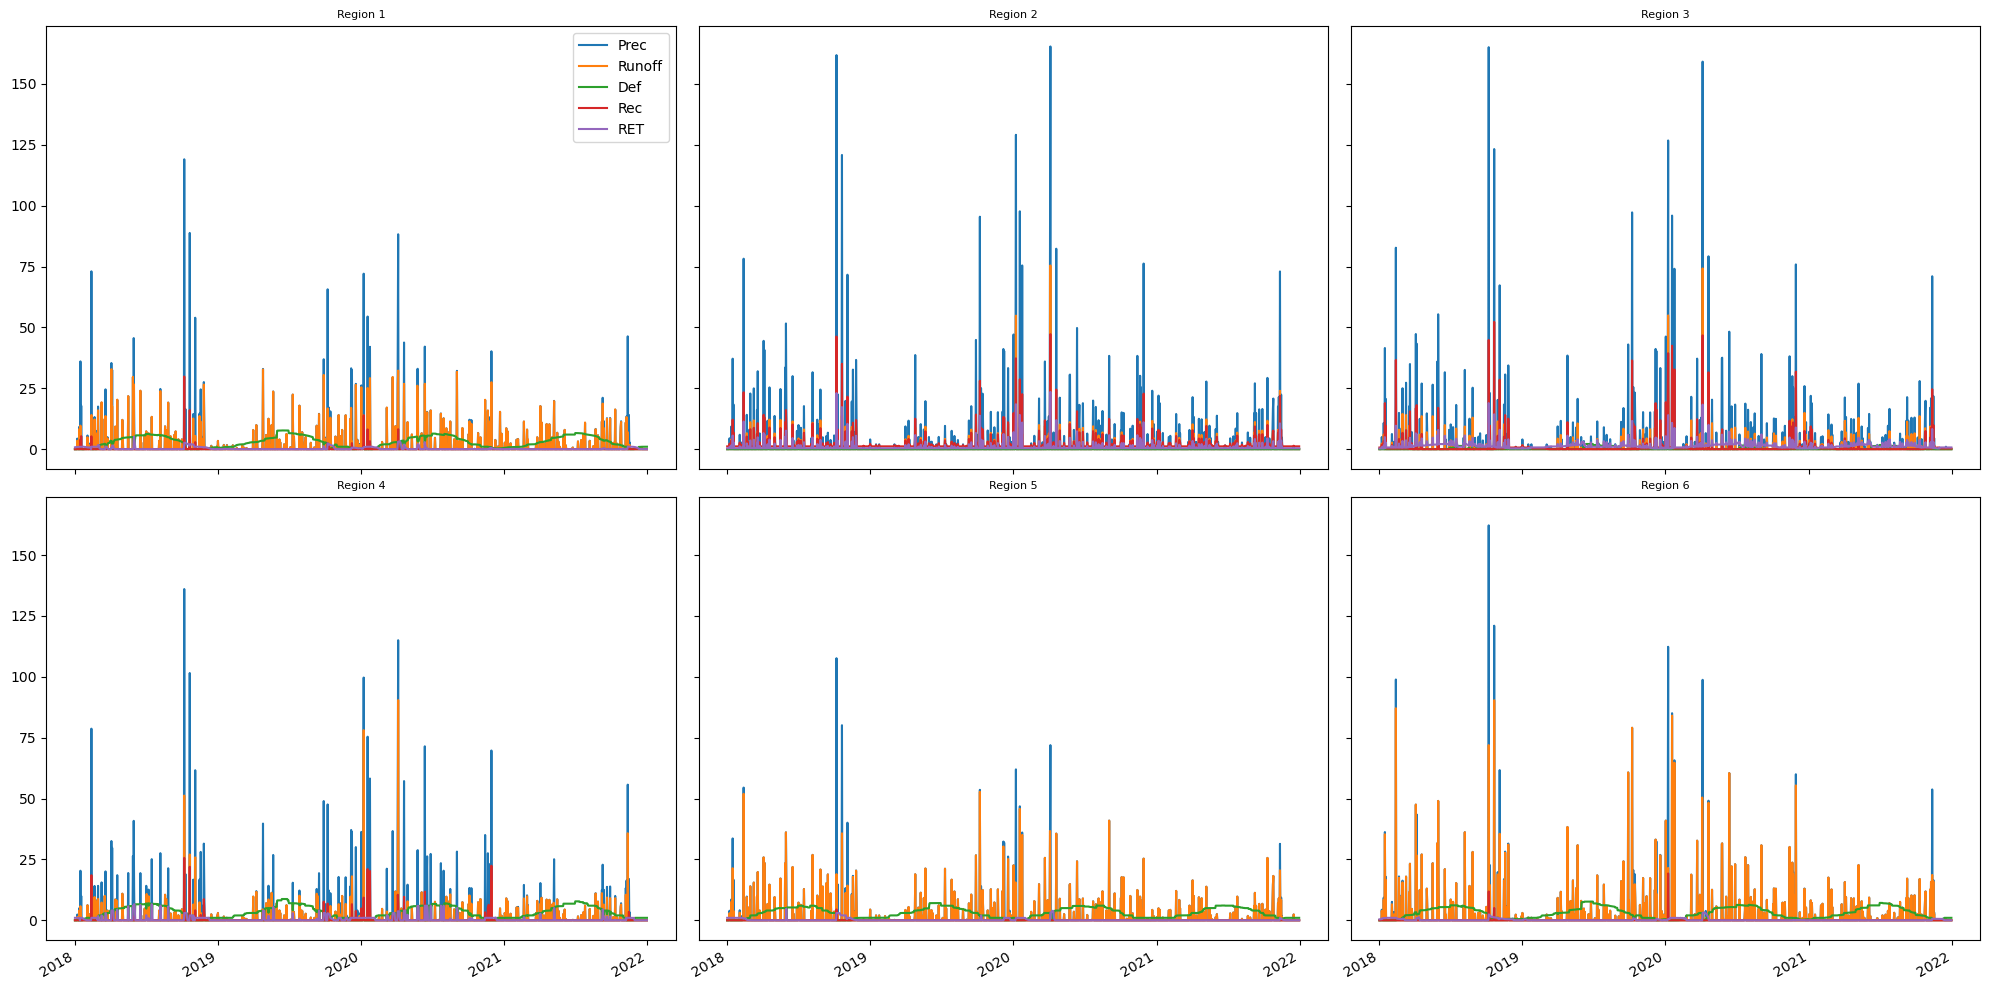

In [4]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(2,3,sharex=True, sharey=True)
#ax = plt.gca()

df_=df.set_index(pd.to_datetime(df["Time"]))
df_.index = pd.to_datetime(df_.index).date
zones=[1,2,3,4,5,6]
featlist=["Prec","Runoff","Def","Rec","ETR"]
#featlist=["Runoff"]
for zone in zones:
    print (zone)
    for featu in featlist:
        ii="REG_"+str(zone)+"_"+featu
        #print (ii)
        df_.loc[df_[ii] <0, ii] = 0
        if featu=="ETR": featu="RET"
        plt.subplot(2, 3, zone).plot(df_[ii],label=featu)
        if zone==1: plt.legend()
    
    #plt.ylim(0,180)
    plt.subplot(2, 3, zone)
    #plt.legend()
    plt.xticks(rotation=90)
    plt.title("Region "+ str(zone),fontsize=8)
    plt.subplot(2, 3, zone).xaxis.set_major_locator(mdates.YearLocator())
    plt.subplot(2, 3, zone).xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    fig.tight_layout(h_pad=0.5,w_pad=1)

plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs",str(zone)+"_all_features.png"),dpi=600)
plt.show()

In [ ]:
df_["REG_6_Prec"].plot()